# Movie Rating prediction 🍿

This notebook build a Movie Rating Predictions by using the IMDb datasets for predictions.

## Problem Definiton 🙋

This project is focusing on prediction the rating in term of starts by processing from given features.

## Data 💿

The training data have got from Kaggle datasets. 
You can inspect the whole information in this link:
https://www.kaggle.com/PromptCloudHQ/imdb-data

## Evaluation 🧾

The evaluation is a `Root mean squred (RMSE)` for evaluate the model wether good or not?

## Features 🧳

There is some information about train data.

* We're dealing with tabular data about 1,000 movies in the last 10 years.







In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("data/IMDB-Movie-Data.csv")
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


## Data Exploration 🔎



In [58]:
# We are actully dealing with 1,000 movies from IMDb datasets !
df["Title"].value_counts().sum()

1000

In [59]:
# And what about genre?
len(df["Genre"].value_counts())

207

In [60]:
# Let's see the dataframe wheter have any missing data or not?

df.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [61]:
df.isna().sum().sum()

192

## Data Preparation 🎬

There are have categorical feature and numerical feture. Moreover, there are still have missing data for 192 rows. 

This our plan that we're going to go along.
* Dropping every rows that contains missing value
* Categorize the data type 
* Turn the categorical feature into numerical feature


### 1. Dropping every rows that contains missing value.

In [62]:
df.dropna(inplace=True)

In [63]:
# Check the missing values
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [64]:
# Check amount data after removie the Missing value
len(df)

838

### 2. Categorize categorical feature 

* Nomical data - `Genre`,`Director`
* Ordinal data - None

The dataset has't Ordinal data. the categorical feature that we didn't categorize have to be drop out.


Before we move on, we going to split the column that have comma `,` 

In [65]:
# Drop Rank, Title and Description
df.drop([
    "Rank",
    "Title",
    "Description",
    "Actors"],
    axis=1,
    inplace=True)
df.reset_index()

,index,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,0,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0
1,1,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0
2,2,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0
3,3,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0
4,4,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...
833,993,"Action,Adventure,Horror",Paul W.S. Anderson,2010,97,5.9,140900,60.13,37.0
834,994,Comedy,Nima Nourizadeh,2012,88,6.7,164088,54.72,48.0
835,996,Horror,Eli Roth,2007,94,5.5,73152,17.54,46.0
836,997,"Drama,Music,Romance",Jon M. Chu,2008,98,6.2,70699,58.01,50.0


In [66]:
df.head(3)

,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0
2,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0


In [67]:
df.dtypes

Genre                  object
Director               object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [68]:
# Split the genre feature into sub genre

def split_subgenre(data):
    """
    Split the featre into sub feature.
    """
    
    temp = {
        "genre_0" : [],
        "genre_1" : [],
        "genre_2" : []
    }
    
    for content in data:
        separated = content.split(",")
        if len(separated) == 3:
            for item in separated:
                temp["genre_"+str(separated.index(item))].append(item)
        else:
            for item in list(range(3)):
                try:
                    temp["genre_"+str(item)].append(separated[item])
                except IndexError:
                    temp["genre_"+str(item)].append("missing")
                    
    return pd.DataFrame.from_dict(temp,orient="index").T
            

In [69]:
%%time

df_sub_genre = split_subgenre(df["Genre"].values)


CPU times: user 111 ms, sys: 4.91 ms, total: 116 ms
Wall time: 133 ms


In [70]:
df_sub_genre

,genre_0,genre_1,genre_2
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,missing
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy
...,...,...,...
833,Action,Adventure,Horror
834,Comedy,missing,missing
835,Horror,missing,missing
836,Drama,Music,Romance


In [71]:
len(df["Genre"].values)

838

In [72]:
df_sub_genre.isna().sum()

genre_0    0
genre_1    0
genre_2    0
dtype: int64

In [73]:
df_sub_genre.value_counts()

genre_0    genre_1    genre_2
Action     Adventure  Sci-Fi     50
Comedy     Drama      Romance    30
Drama      missing    missing    29
           Romance    missing    27
Comedy     missing    missing    26
                                 ..
           Horror     Romance     1
Adventure  Drama      History     1
                      Horror      1
Comedy     Fantasy    Romance     1
Thriller   missing    missing     1
Length: 189, dtype: int64

In [74]:
## Merge subgenre into main dataframe
df_merged = pd.merge(df,df_sub_genre,left_index=True, right_index=True)

In [75]:
## Drop Genre feature
df_merged = df_merged.drop("Genre",axis=1)

In [76]:
df_merged

,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genre_0,genre_1,genre_2
0,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,missing
3,Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,David Ayer,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy
...,...,...,...,...,...,...,...,...,...,...
833,Andy Tennant,2008,112,5.7,62719,70.22,29.0,Action,Adventure,Horror
834,Larry Charles,2012,83,6.4,225394,59.62,58.0,Comedy,missing,missing
835,Erik Van Looy,2014,108,6.3,38804,5.98,24.0,Horror,missing,missing
836,Cristian Mungiu,2016,128,7.5,5531,0.13,84.0,Drama,Music,Romance


Text(0.5, 1.0, 'Correlation map')

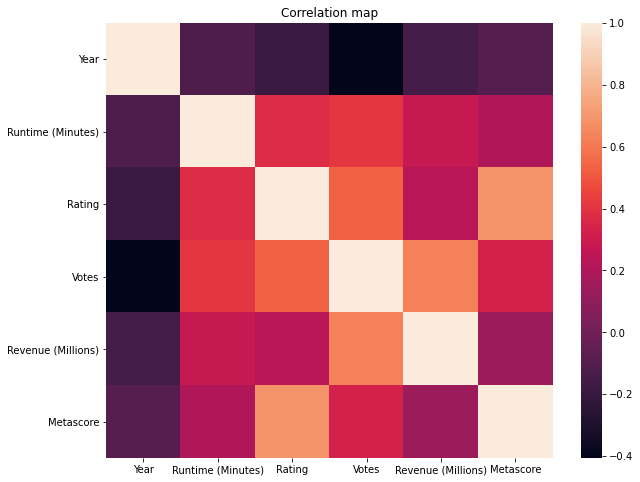

In [77]:
fig ,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(df_merged.corr('pearson'))
ax.set_title("Correlation map")

As you can see in correlation map by pearson, we would know that categorical data seem not importance to predict the `Rating` label. So, we're not going to Encode any of them and drop them out.

### Rescalling data

In [138]:
# Split the data
X = df_merged.drop(["Rating","Director","genre_0","genre_1","genre_2","Year"],axis=1)
y = df_merged["Rating"]

In [151]:
# Rscalling data for datasets, by StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [104]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# ohe = OneHotEncoder()

# # Define categorical feature and transform pipeline
# categorical_features = ["Director","genre_0","genre_1","genre_2"]
# transformer = ColumnTransformer([
#     ("onehot",ohe,categorical_features)
# ])

# transformered_X = transformer.fit_transform(X)



array([[-3.53144091e-01, -3.57366561e-01,  1.73016105e-01,
        -8.96776590e-02, -3.26956072e-01],
       [-3.42923109e-01, -3.44689141e-01,  1.72964977e-01,
        -1.83230538e-01, -3.19692079e-01],
       [-2.83240803e-01, -2.79972734e-01,  1.72209159e-01,
         1.37419271e-01, -2.63253695e-01],
       ...,
       [-1.38325945e-02, -9.29084734e-03,  1.59261462e-01,
        -2.38616306e-01, -2.14481066e-01],
       [ 1.99080870e+00,  2.50944649e+00, -4.48724775e-01,
        -3.07236850e-01,  2.75276165e+00],
       [-2.86574657e-01, -2.86577701e-01,  1.72273784e-01,
         3.81512797e-04, -2.76818127e-01]])

In [81]:
X.shape , y.shape

((712, 5), (712,))

### Buliding a model 

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split

np.random.seed(42)
# Split the data into X and y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape , X_test.shape , y_test.shape 



((569, 4), (569,), (143, 4), (143,))

In [153]:
np.random.seed(42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model_score = model.score(X_test,y_test)

can we evaluate other model for best score ?


### Evaluate the model

We going to compare ordinary model `RandomForestRegressor` and other model that similiar with.



In [154]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

np.random.seed(42)
models = {"RandomForest" : RandomForestRegressor(),
          "Ridge" : Ridge()}
results = {"RandomForest" : [] , "Ridge" : []}

for k , v in models.items():
    print(f"Evaluate {k}...")
    v.fit(X_train, y_train)
    y_preds = v.predict(X_test)

    results[k].append(mean_absolute_error(y_test, y_preds))
    results[k].append(r2_score(y_test, y_preds))
    results[k].append(mean_squared_error(y_test, y_preds))
    results[k].append(sqrt(mean_squared_error(y_test,y_preds)))
    


Evaluate RandomForest...
Evaluate Ridge...


In [142]:
results

{'RandomForest': [0.42013986013986016,
  0.5989397974483079,
  0.33487046153846145,
  0.5786799301327648],
 'Ridge': [0.41188061756583855,
  0.6219825135322234,
  0.315630644371297,
  0.5618101497581697]}

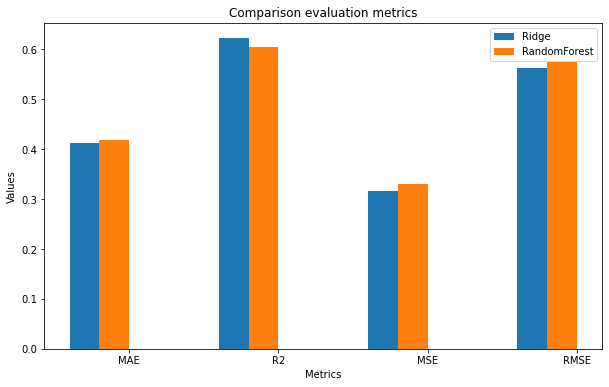

In [155]:
#Let's make it more visualize!

xtick = ["MAE","R2","MSE","RMSE"]
length = len(xtick)
width = 0.2
x = np.arange(length)

fig , ax = plt.subplots(figsize = (10,6))

ax.bar(x,results["Ridge"],width,label="Ridge")
ax.bar(x + 0.2,results["RandomForest"],width,label="RandomForest")
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(xtick)
ax.set_title("Comparison evaluation metrics")
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.legend();

There are something that we get from visual the bar plot.
* Ridge has R2 Score greater than RandomForest, the ordinary one.

But in regression model, we compare model with `RMSE` metrics.
So, we still uses our RandomForestRegressor as baseline model.

### Tunning Hyperparameter 

We had compared between RandomForestRegessor and Ridge, which output is the RandomForestRegressor. 
The answer of question that "Are we select the right model?" is clear. but can we increases accuracy of our model a bit ?

So, we'll useing `RandomizedSearchCV` because dataset have a huge one. if we find the best params each iterator. it will waste a lot of time. 

In [126]:
%%time
from sklearn.model_selection import RandomizedSearchCV

random_params = {
    "n_estimators" : [int(x) for x in np.linspace(0,1000,200) ],
    "max_features" : ['auto','sqrt'],
    "min_samples_leaf" : [x for x in range(2,10,3)],
    "min_samples_split" : [2,5,10],
    "bootstrap": [True, False]
}

rf = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=random_params,
                                   n_iter=100,
                                   cv = 5,
                                   verbose=3,
                                   random_state =42,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


CPU times: user 2.34 s, sys: 134 ms, total: 2.47 s
Wall time: 4min 9s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [0, 5, 10, 15, 20, 25,
                                                         30, 35, 40, 45, 50, 55,
                                                         60, 65, 70, 75, 80, 85,
                                                         90, 95, 100, 105, 110,
                                                         115, 120, 125, 130,
                                                         135, 140, 145, ...]},
                   random_state=42, verbose=3)

In [127]:
# Check best params 
random_search.best_params_

{'n_estimators': 417,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'bootstrap': True}

In [144]:
# Check r2 score with best params
np.random.seed(42)
tune_model = RandomForestRegressor(n_estimators = 417,
                              min_samples_split=10,
                              min_samples_leaf=8,
                              max_features= 'auto',
                              bootstrap = True)

tune_model.fit(X_train, y_train)
score_tuned = tune_model.score(X_test, y_test)

In [145]:
# Tune Ridge model
# for Ridge mode we will use the GridSerachCV becuase the model has less hyperparameter. 
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

grid = {}
grid["alpha"] = np.arange(0,1,0.1)
grid["solver"] = ['sag', 'auto', 'svd']

ridge_tune = GridSearchCV(Ridge(), grid ,
                                   cv = 5,
                                   verbose=3,
                                   n_jobs = -1 )
ridge_tune.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'solver': ['sag', 'auto', 'svd']},
             verbose=3)

In [146]:
# Check scoring of Ridge tuned model
ridge_tune.best_params_


{'alpha': 0.9, 'solver': 'auto'}

In [135]:
ridge_tuned = Ridge(alpha = 0.9, solver = 'auto')
ridge_tuned.fit(X_train, y_train)
ridge_tuned_score = ridge_tuned.score(X_test, y_test)

In [148]:
def evaluate_model(model,tuned):
    """
    Evaluate and return the metric and imporve rate of given model.
    """
    print(f"Ordinary model score: {round(model * 100,2)}%")
    print(f"Tune model score: {round(tuned*100,2)}%")
    print(f"Improve {(tuned - model_score) * 100}%")

In [149]:
# Evaluate score for RandomForestRegressor

evaluate_model(model_score, score_tuned)

Ordinary model score: 59.89%
Tune model score: 60.5%
Improve 0.6041357338986808%


In [150]:
# Evalute score for Ridge

evaluate_model(results["Ridge"][1],ridge_tuned_score)

Ordinary model score: 62.2%
Tune model score: 62.0%
Improve 2.106083503440792%
